# KNN Python - BigMart Sales
BigMart have collected sales data for 1559 products across 10 stores in different cities. Also, certain
attributes of each product and store have been collected. The aim is to build a predictive model and find out the sales of each product at a particular store.

* 'Item_Idenfier': Unique product ID
* 'Item_Weight': Weight of product
* 'Item_Fat_Content': Whether the product is low fat or not
* 'Item_Visibility': The % of total display area of all products in a store allocated to the particular product
* 'Item_Type': The category to which the product belongs
* 'Item_MRP': Maximum Retail Price (list price) of the product
* 'Outlet_Idenfier': Unique store ID
* 'Outlet_Establishment_Year': The year in which store was established
* 'Outlet_Size': The size of the store in terms of ground area
* 'Outlet_Location_Type': The type of city in which the store is located
* 'Outlet_Type': Whether the outlet is just a grocery store or some sort of supermarket
* 'Item_Outlet_Sales': Sales of the product in the particular store. This is the outcome variable to be predicted.

## Data PreProcessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bigmart_sales.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,NCR42,9.105,Low Fat,0.0,Household,33.3900,OUT010,1998,Small,Tier 3,Grocery Store,33.2900
1,DRK12,9.500,Low Fat,0.0,Household,32.8900,OUT010,1998,Small,Tier 3,Grocery Store,33.2900
2,FDU21,NaN,Low Fat,0.0,Household,35.0558,OUT019,1998,Small,Tier 3,Grocery Store,33.9558
3,NCL41,NaN,Low Fat,0.0,Household,34.3216,OUT019,1998,Small,Tier 3,Grocery Store,34.6216
4,FDQ47,7.155,Low Fat,0.0,Household,33.8874,OUT010,1998,Small,Tier 3,Grocery Store,35.2874


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6655 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.058896,140.992782,1998.136806,2203.997242
std,4.643456,0.049820,62.275067,8.104664,1692.026496
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.021236,93.826500,1987.000000,889.175900
50%,12.600000,0.046747,143.012800,1999.000000,1821.628800
75%,16.850000,0.087414,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Data Cleaning

In [6]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1868
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Missing values in Item_weight and Outlet_size needs to be imputed. Since Item Weight is continous, we can impute it with mean value. Outlet_Size is discrete, thus, we need to use mode.

In [7]:
mean_weight = df["Item_Weight"].mean()
df["Item_Weight"].fillna(mean_weight, inplace=True)

In [8]:
most_common_outlet_size = df['Outlet_Size'].mode()

In [9]:
most_common_outlet_size[0]

'Small'

In [10]:
df['Outlet_Size'].fillna(most_common_outlet_size[0], inplace=True)

In [11]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Exploratory Data Analysis

In [12]:
df["Item_Identifier"].nunique()

1559

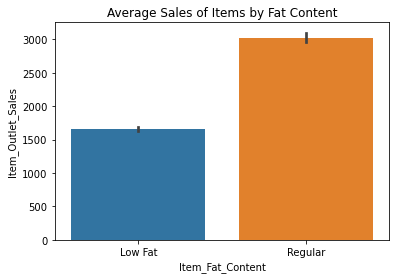

In [13]:
sns.barplot(data=df, x="Item_Fat_Content", y="Item_Outlet_Sales")
plt.title("Average Sales of Items by Fat Content")
plt.show()

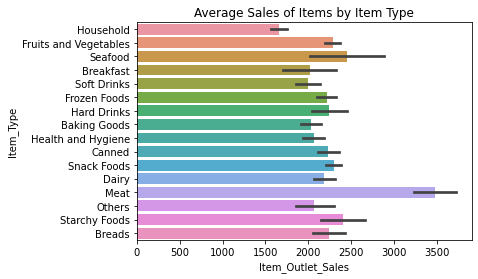

In [14]:
sns.barplot(data=df, y="Item_Type", x="Item_Outlet_Sales")
plt.title("Average Sales of Items by Item Type")
plt.show()

In [15]:
df["Outlet_Identifier"].unique()

array(['OUT010', 'OUT019', 'OUT013', 'OUT045', 'OUT018', 'OUT046',
       'OUT035', 'OUT017', 'OUT049', 'OUT027'], dtype=object)

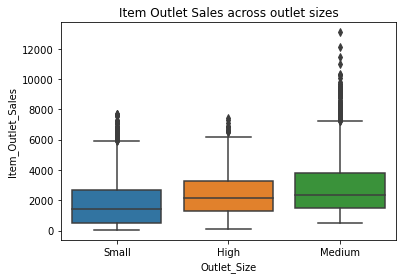

In [16]:
sns.boxplot(data=df, x="Outlet_Size", y ="Item_Outlet_Sales" )
plt.title("Item Outlet Sales across outlet sizes")
plt.show()

In [17]:
df["Outlet_Location_Type"].unique()

array(['Tier 3', 'Tier 1', 'Tier 2'], dtype=object)

In [18]:
df["Outlet_Type"].unique()

array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)

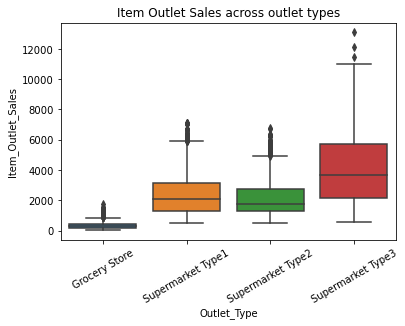

In [19]:
ax = sns.boxplot(data=df, x="Outlet_Type", y ="Item_Outlet_Sales" )
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.title("Item Outlet Sales across outlet types")
plt.show()

We are dropping the ID Fields and creating dummy variables for the other categorical variables

In [20]:
df.drop(['Item_Identifier'], axis=1, inplace=True)

In [21]:
df=pd.get_dummies(df)

In [22]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.105000,0.0,33.3900,1998,33.2900,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
1,9.500000,0.0,32.8900,1998,33.2900,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
2,12.857645,0.0,35.0558,1998,33.9558,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
3,12.857645,0.0,34.3216,1998,34.6216,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4,7.155000,0.0,33.8874,1998,35.2874,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0


## Train/Test Split

In [23]:
X = df.drop(["Item_Outlet_Sales"], axis=1)
y = df["Item_Outlet_Sales"]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Data Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [26]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Algorithm Setup

In [27]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 2)

## Model Training

In [28]:
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=2)

## Model Testing

In [29]:
predictions = knn.predict(X_test)

## Model Evaluation

In [30]:


from sklearn import metrics

print("MAE", metrics.mean_absolute_error(y_test,predictions))
print("MSE", metrics.mean_squared_error(y_test,predictions)) 
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE 800.3619072140763
MSE 1327698.2730166935
RMSE 1152.2579021281188


### Grid Search

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': list(range(1,31)), 'metric': ["euclidean", "manhattan"]}

In [32]:
grid = GridSearchCV(KNeighborsRegressor(), param_grid, verbose =3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END ...metric=euclidean, n_neighbors=1;, score=0.423 total time=   0.1s
[CV 2/5] END ...metric=euclidean, n_neighbors=1;, score=0.394 total time=   0.1s
[CV 3/5] END ...metric=euclidean, n_neighbors=1;, score=0.360 total time=   0.1s
[CV 4/5] END ...metric=euclidean, n_neighbors=1;, score=0.426 total time=   0.1s
[CV 5/5] END ...metric=euclidean, n_neighbors=1;, score=0.361 total time=   0.1s
[CV 1/5] END ...metric=euclidean, n_neighbors=2;, score=0.536 total time=   0.1s
[CV 2/5] END ...metric=euclidean, n_neighbors=2;, score=0.537 total time=   0.1s
[CV 3/5] END ...metric=euclidean, n_neighbors=2;, score=0.529 total time=   0.1s
[CV 4/5] END ...metric=euclidean, n_neighbors=2;, score=0.554 total time=   0.1s
[CV 5/5] END ...metric=euclidean, n_neighbors=2;, score=0.509 total time=   0.1s
[CV 1/5] END ...metric=euclidean, n_neighbors=3;, score=0.586 total time=   0.1s
[CV 2/5] END ...metric=euclidean, n_neighbors=3

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             verbose=3)

In [33]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 6}

In [34]:
grid_predictions = grid.best_estimator_.predict(X_test)

In [35]:
print("MAE", metrics.mean_absolute_error(y_test,grid_predictions))
print("MSE", metrics.mean_squared_error(y_test,grid_predictions)) 
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test,grid_predictions)))

MAE 778.049631202346
MSE 1178089.3757455533
RMSE 1085.3982567452158
